<a href="https://colab.research.google.com/github/jeehyun100/MTCNN/blob/master/cartpole_gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cart Pole 봉세우기

In [4]:
import numpy as np
import tensorflow as tf
import random
import gym
from collections import deque

# Openai Gym 및 ipython display Setting
## colab에서 gym 환경을 plotting해서 볼수 있게 설정

In [1]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

!apt-get install x11-utils > /dev/null 2>&1 and !pip install pyglet==v1.3.
!pip install gym --upgrade > /dev/null 2>&1
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [2]:
!pip install pyglet

# Cartpole 문제정의
## 이 게임은 손 위에 막대를 세워놓고, 막대가 쓰러지지 않도록 하는 게임입니다.

ㆍObservation : [x, θ, dx/dt, dθ/dt]
- x : track 상에서 cart의 위치
- θ : pole과 normal line과의 각도
- dx/dt : cart의 속도
- dθ/dt : θ의 각속도

ㆍEnding condition(of episode)
 1.   θ가 15˚이상
 2.   원점(O: cetroid of track)으로부터의 거리가 2.4 units이상 

ㆍAction : cart의 가하는 힘의 방향 (0 or 1)

ㆍReward : episode가 유지되는 시간

ㆍObjective : Ending condition을 피하며 reward를 최대로(pole의 균형을 오랫동안 유지)



action, state : 1 [ 0.68719519  0.77074522 -0.84255078 -2.68567873]
Input space 4
Output space(Action) 2


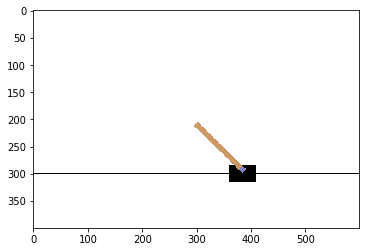

In [5]:
from pyvirtualdisplay import Display
Display().start()

import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('CartPole-v0')
state = env.reset()
img = plt.imshow(env.render('rgb_array'))
with tf.Session() as sess:

    #mainDQN = DQN(sess, INPUT_SIZE, OUTPUT_SIZE)
    init = tf.global_variables_initializer()
    #mainDQN.load("dqn_v1")
    for _ in range(50):
        img.set_data(env.render('rgb_array')) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)
        action = env.action_space.sample()
        #action = np.argmax(mainDQN.predict(state))
        print()
        next_state, reward, done, _ = env.step(action)
        state = next_state
        print("action, state : {0} {1}".format(action,state ))
print("Input space {0}".format(env.observation_space.shape[0]))
print("Output space(Action) {0}".format(env.action_space.n))
